In [1]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv("D:/mail_data.csv")
X = df['Message']
y = df['Category']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [4]:

y_pred_proba = model.predict_proba(X_test)[:, 1] 

In [5]:
# Step 6: Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='spam')
roc_auc = auc(fpr, tpr)

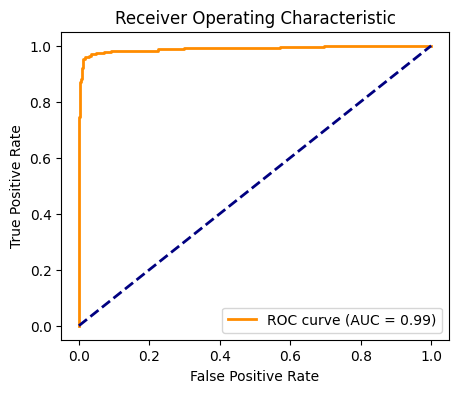

In [15]:

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [7]:

print(f"AUC: {roc_auc:.2f}")

AUC: 0.99


In [8]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.99
Recall: 0.74
F1-Score: 0.84


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1446    2]
 [  59  165]]


In [11]:
# Perform k-Fold Cross-Validation
k = 5
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Std of Accuracy: {std_accuracy:.2f}")

Mean Accuracy: 0.96
Std of Accuracy: 0.00
